# Regressor that recommends the “Personnel_needed” size for given Dish

### 1. Read the file and display columns

In [278]:
import pandas as pd

df = pd.read_csv('menu_info.csv', encoding= 'unicode_escape')

In [279]:
df.head()

,Dish_name,Restaurant,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [280]:
df.tail()

,Dish_name,Restaurant,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88
157,Surf,Windstar,23,14.745,3.08,6.17,1.56,47.87,1.80


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dish_name             158 non-null    object 
 1   Restaurant            158 non-null    object 
 2   Preparation_duration  158 non-null    int64  
 3   Price                 158 non-null    float64
 4   Consumption_duration  158 non-null    float64
 5   Serving_duration      158 non-null    float64
 6   Waiting_duration      158 non-null    float64
 7   Spice_density         158 non-null    float64
 8   Personnel_needed      158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [282]:
df.shape

(158, 9)

### 2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations

In [283]:
df.describe()

,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


### Observation 1
We observe that variables are on different scales, for sample the Serving_duration variable ranges from about 3 minutes to 17 minutes, while the Price variable ranges from 2 to 220. It is therefore important that when a regression model is built using these variables, variables be brought to same scale either by standardizing or normalizing the data. 

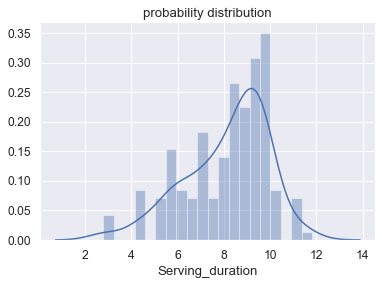

In [285]:
sns.distplot(df['Serving_duration'],bins=20)
plt.title('probability distribution')
plt.show()

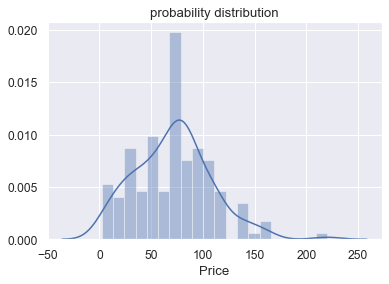

In [286]:
sns.distplot(df['Price'],bins=20)
plt.title('probability distribution')
plt.show()

In [287]:
columns = df.columns.to_list()

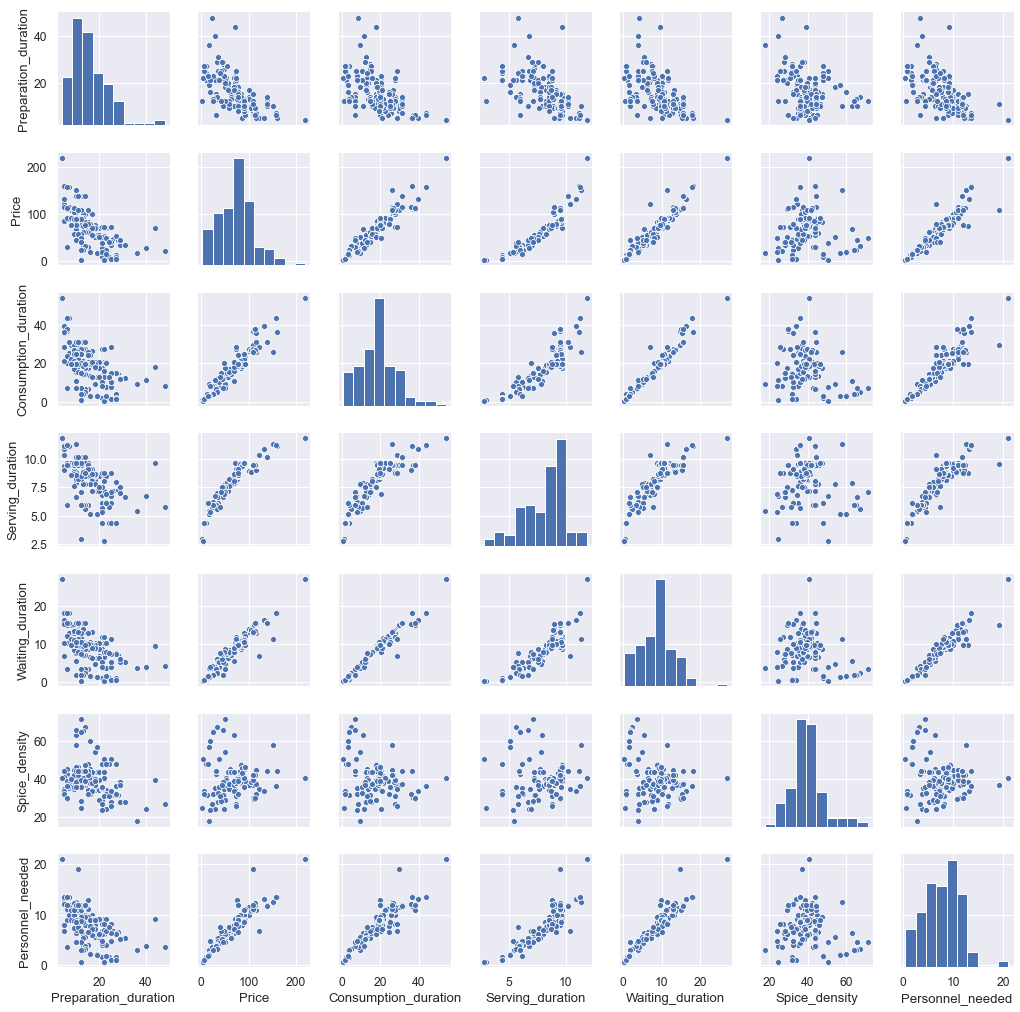

In [288]:
sns.pairplot(df[columns], size=2.0)

### Observation 2 
We also observe from the visuals that the target variable 'Personnel_needed' correlates well with 4 predictor variables, namely, 'Waiting_duration', 'Price', 'Consumption_duration'and 'Serving_duration'.

### 3. Select columns that will probably be important to predict “Personnel_needed” size 
### 4. If you removed columns, explain why you removed those

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

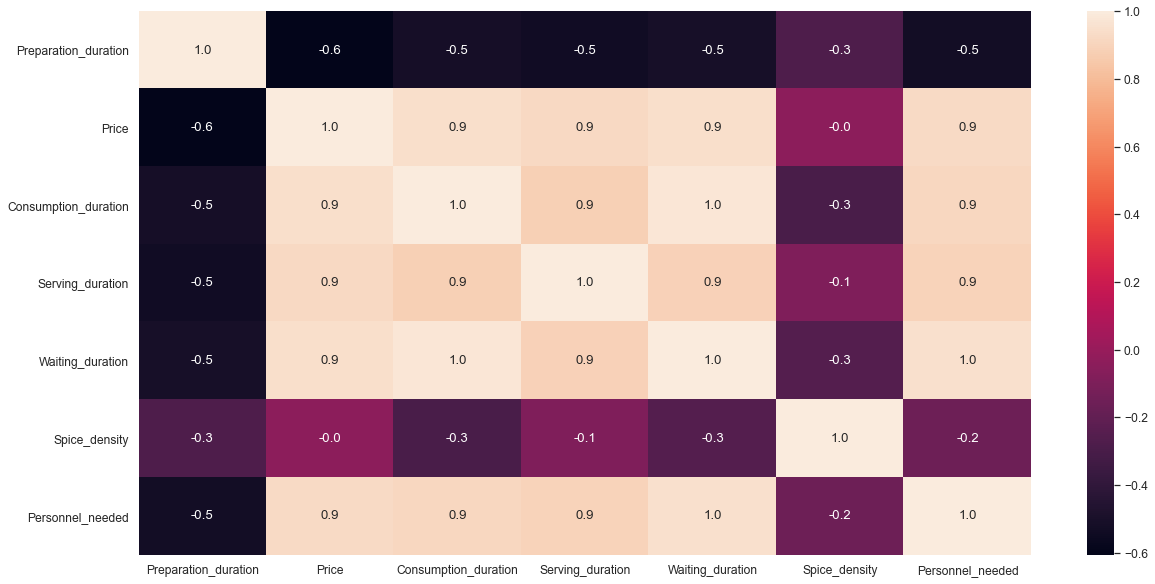

In [290]:
sns.set(font_scale=1.1)
correlation_menu=df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_menu, annot=True, fmt='.1f')
plt.show()

In [291]:
correlation_menu.columns

Index(['Preparation_duration', 'Price', 'Consumption_duration',
       'Serving_duration', 'Waiting_duration', 'Spice_density',
       'Personnel_needed'],
      dtype='object')

In [292]:
correlation_menu_dict = correlation_menu['Personnel_needed'].sort_values(ascending = False).to_dict()

In [293]:
correlation_menu_dict

{'Personnel_needed': 1.0,
 'Waiting_duration': 0.95082260635785,
 'Price': 0.9275688115449391,
 'Consumption_duration': 0.9152341306065394,
 'Serving_duration': 0.8958566271016578,
 'Spice_density': -0.15550928421699733,
 'Preparation_duration': -0.5306565039638859}

In [294]:
low_corr_features = []
for key, value in correlation_menu_dict.items():
    val_abs = abs(value)
    if val_abs < 0.8:
        low_corr_features.append(key)

In [295]:
low_corr_features

['Spice_density', 'Preparation_duration']

In [296]:
high_corr_features = []
for key, value in correlation_menu_dict.items():
    val_abs = abs(value)
    if val_abs > 0.8:
        high_corr_features.append(key)

In [297]:
high_corr_features

['Personnel_needed',
 'Waiting_duration',
 'Price',
 'Consumption_duration',
 'Serving_duration']

In [298]:
data = df.drop(columns=low_corr_features, axis=1)

In [299]:
data.shape

(158, 7)

In [300]:
data.head()

,Dish_name,Restaurant,Price,Consumption_duration,Serving_duration,Waiting_duration,Personnel_needed
0,Journey,Azamara,30.277,6.94,5.94,3.55,3.55
1,Quest,Azamara,30.277,6.94,5.94,3.55,3.55
2,Celebration,Carnival,47.262,14.86,7.22,7.43,6.70
3,Conquest,Carnival,110.000,29.74,9.53,14.88,19.10
4,Destiny,Carnival,101.353,26.42,8.92,13.21,10.00


In [301]:
data = data.drop(['Dish_name',"Restaurant"], axis = 1 )

In [302]:
data.head()

,Price,Consumption_duration,Serving_duration,Waiting_duration,Personnel_needed
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


### 4.Use one-hot encoding for categorical features

In [312]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

enc_data = pd.DataFrame(encoder.fit_transform(df.select_dtypes(include='object')).toarray())

In [313]:
enc_data

,0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [314]:
data_e = df.join(enc_data)

In [315]:
data_e

,Dish_name,Restaurant,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed,0,...,148,149,150,151,152,153,154,155,156,157
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [316]:
data_e = data_e.drop(columns = (data_e.select_dtypes(include='object')))

In [317]:
data_e.head()

,Preparation_duration,Price,Consumption_duration,Serving_duration,Waiting_duration,Spice_density,Personnel_needed,0,1,2,...,148,149,150,151,152,153,154,155,156,157
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6. Create training and testing sets (use 60% of the data for the training and reminder for testing)

In order to build a simplified regression model, I will focus only on numerical features. The categorical features "Dish_name" and "Restaurant" will not be used. A simple model built using only the high correlated features will be simple to interpret.

In [322]:
data.head()

,Price,Consumption_duration,Serving_duration,Waiting_duration,Personnel_needed
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [325]:
data.iloc[:,4]

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: Personnel_needed, Length: 158, dtype: float64

In [326]:
y = pd.DataFrame(data.iloc[:,4])
X = data.drop(['Personnel_needed'], axis=1)

In [327]:
y.shape

(158, 1)

In [328]:
X.shape

(158, 4)

In [331]:
X.head()

,Price,Consumption_duration,Serving_duration,Waiting_duration
0,30.277,6.94,5.94,3.55
1,30.277,6.94,5.94,3.55
2,47.262,14.86,7.22,7.43
3,110.000,29.74,9.53,14.88
4,101.353,26.42,8.92,13.21


In [332]:
y.head()

,Personnel_needed
0,3.55
1,3.55
2,6.70
3,19.10
4,10.00


In [333]:
#Standardize X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_fit = scaler.fit_transform(X)
X = pd.DataFrame(data = X_fit, columns = X.columns)

In [334]:
#split the data, 60% train, 40% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

### 7. Build a machine learning model to predict the ‘Personnel_needed’ size

In [335]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

### Linear Regression

In [336]:
regr = linear_model.LinearRegression()
results = regr.fit(X_train, y_train)
y_pred_lr = regr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr )

### Lasso Regression

In [337]:
lasso = linear_model.Lasso(alpha=0.1)
res_lasso = lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

### Random Forest

In [338]:
random_f = RandomForestRegressor(random_state=1)
regr_rf = random_f.fit(X_train, y_train)
y_pred_rf = random_f.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf )

### SVR

In [339]:
svr = SVR(kernel = 'rbf', C=100, epsilon=0.9, gamma = 'auto')
regr_svr = svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr )

### KNN

In [340]:
knn = KNeighborsRegressor(n_neighbors = 3)
regr_knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn )

### Comparison Table of evaluation of the models

In [341]:
result = {'Metric':  ['MAE'],
        'Linear Regression': [mae_lr],
        'LASSO': [mae_lasso],
        'Random Forest': [mae_rf],
        'SVR':[mae_svr],
        'KNN':[mae_knn],
        }
comparison = pd.DataFrame (result, columns = ['Metric','Linear Regression', 'LASSO','Random Forest', 'SVR', 'KNN'])
comparison

,Metric,Linear Regression,LASSO,Random Forest,SVR,KNN
0,MAE,0.569686,0.619807,0.451385,0.629282,0.492865


#### Observation: I used several regresion models to compare which is the best. The best results gave Random Forest with MAE of 0.45, so in the addition of this task I will work with that regresor to optimaze and to get the best results.

[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

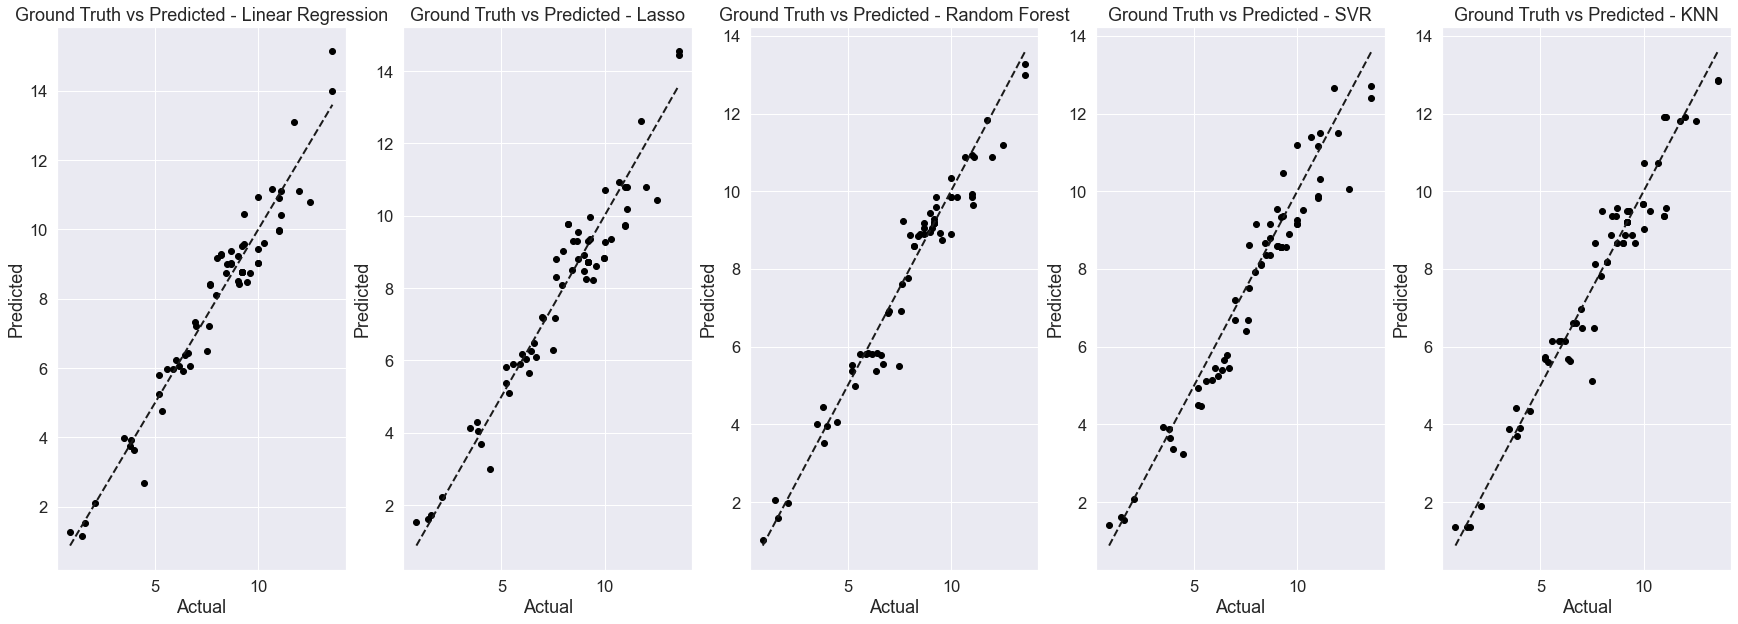

In [349]:
sns.set(font_scale=1.5)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30,10))

ax1.scatter(y_test, y_pred_lr, color='black')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_title('Ground Truth vs Predicted - Linear Regression')
ax1.set(xlabel='Actual', ylabel='Predicted')

ax2.scatter(y_test, y_pred_lasso, color='black')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_title('Ground Truth vs Predicted - Lasso')
ax2.set(xlabel='Actual', ylabel='Predicted')

ax3.scatter(y_test, y_pred_rf, color='black')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_title('Ground Truth vs Predicted - Random Forest')
ax3.set(xlabel='Actual', ylabel='Predicted')

ax4.scatter(y_test, y_pred_svr, color='black')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax4.set_title('Ground Truth vs Predicted - SVR')
ax4.set(xlabel='Actual', ylabel='Predicted')

ax5.scatter(y_test, y_pred_knn, color='black')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax5.set_title('Ground Truth vs Predicted - KNN')
ax5.set(xlabel='Actual', ylabel='Predicted')

### 9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model

#### Random Forest Regressor

In [343]:
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

from sklearn.model_selection import RandomizedSearchCV

random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_regr = RandomForestRegressor()
model_rf = RandomizedSearchCV(estimator = rf_regr, param_distributions = random_search, n_iter = 50, 
                               cv = 3, verbose= 5, random_state= 1, n_jobs = -1)

model_rf.fit(X_train,y_train)
y_pred_hp_rf = model_rf.best_estimator_.predict(X_test)
mae_hp_rf = mean_absolute_error(y_test, y_pred_hp_rf)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   17.4s finished


In [344]:
random_compare = {'Metric':  ['MAE'],
        'Random Forest_HP': [mae_hp_rf],
        'Random Forest_default':[mae_rf]
                 }
random_compare = pd.DataFrame (random_compare, columns = ['Metric','Random Forest_HP', 'Random Forest_default'])
random_compare

,Metric,Random Forest_HP,Random Forest_default
0,MAE,0.444383,0.451385


### Cross validation to optimize parametars

In [345]:
list(np.linspace(10, 1200, 3, dtype = int))

[10, 605, 1200]

In [346]:
# We will use Cross validation to optimize parameters

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=10, shuffle=True)

#10-fold Cross validaiton - ALL Model - All scores
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']


#Play with the parameters and choose the best
from sklearn.model_selection import GridSearchCV


grid_search = {'criterion': ['mse'],
               #'max_depth': list(np.linspace(10, 1200, 3, dtype = int)) + [None],
               'max_features': ['auto', 2, 3, None],
               'min_samples_leaf': [1, 5, 10],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [5, 50, 100],
               'random_state': [1]}


clf = RandomForestRegressor()
model = GridSearchCV(estimator = clf, 
                     param_grid = grid_search, 
                     cv = 3, verbose= 5, 
                     n_jobs = -1)
model.fit(X_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 301 out of 324 | elapsed:    3.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    3.4s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse'],
                         'max_features': ['auto', 2, 3, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 50, 100], 'random_state': [1]},
             verbose=5)

In [347]:
print("Best model: ", model.best_estimator_)
print("Best Parameters: ", model.best_params_)
print("Best score ", model.best_score_)
print("Best score ", pd.DataFrame.from_dict(model.cv_results_))

Best model:  RandomForestRegressor(max_features=3, n_estimators=50, random_state=1)
Best Parameters:  {'criterion': 'mse', 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 1}
Best score  0.8627585765968241
Best score       mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.016657      0.000464         0.007006        0.000826   
1         0.099652      0.002057         0.005207        0.007364   
2         0.201687      0.007846         0.017669        0.002056   
3         0.018655      0.001683         0.005001        0.000001   
4         0.090569      0.005887         0.015626        0.000000   
..             ...           ...              ...             ...   
103       0.110396      0.004464         0.005205        0.007361   
104       0.207738      0.003264         0.017927        0.003253   
105       0.015629      0.000003         0.000000        0.000000   
106       0.111088      0.007366       

In [348]:
y_pred = model.best_estimator_.predict(X_test)

#create Dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_dummy = dummy_regr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae3 = mean_absolute_error(y_test, y_dummy)
mse3 = mean_squared_error(y_test, y_dummy)
rmse3 = np.sqrt(mean_squared_error(y_test, y_dummy))
r23 = r2_score(y_test, y_dummy)


#construct the comparison table
data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'RF_Hyper_Grid': [mae,mse,rmse,r2],
        'Dummy': [mae3,mse3,rmse3,r23],
        }

comparison = pd.DataFrame (data, columns = ['Metric','RF_Hyper_Grid', 'Dummy'])
comparison

,Metric,RF_Hyper_Grid,Dummy
0,MAE,0.459782,2.302477
1,MSE,0.434223,8.130243
2,RMSE,0.658956,2.851358
3,R2,0.945977,-0.011513


### 10. Print answer to: What is regularization and what is the regularization parameter in your model?

The regularization parameter reduces overfitting, which reduces the variance of our estimated regression parameters. However, it does this at the expense of adding bias to our estimate. Increasing results in less overfitting but also greater bias. So the real question is "How much bias we are willing to tolerate in our estimate? 
For Random Forest regressor, there is a multiple regularization parameters:
- The number of Decision Trees in the forest (n_estimators)
- The criteria with which to split on each node (MSE or MAE for regression)
- The maximum depth of the individual trees. The larger an individual tree, the more chance it has of overfitting the training data, however, as in Random Forests we have many individual trees.
- The minimum samples to split on at an internal node of the trees.
- Maximum number of leaf nodes.
- Number of random features to include at each node for splitting.
- The size of the bootstrapped dataset to train each Decision Tree with.